<a href="https://colab.research.google.com/github/KlaudiaKawecka/Raport10/blob/main/Raport10_GitHub_cwiczenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Profil

#Raport 7

##**Analiza danych aplikacji mobilnych**
###W tym projekcie analizujemy dane dotyczące aplikacji mobilnych z Google Play i App Store, aby pomóc firmie tworzącej darmowe aplikacje zrozumieć, jakie typy aplikacji przyciągają najwięcej użytkowników. Ponieważ firma zarabia głównie na reklamach wyświetlanych w aplikacjach, kluczowe znaczenie ma zwiększanie liczby użytkowników.
##Celem projektu jest zidentyfikowanie cech aplikacji, które zwiększają ich szanse na sukces rynkowy. Do przeprowadzenia analizy wykorzystamy Pythona oraz środowisko Jupyter Notebook, łącząc wiedzę z zakresu zmiennych, list, słowników, pętli, instrukcji warunkowych i funkcji.

###Otwarcie danych:

In [ ]:
!wget https://dq-content.s3.amazonaws.com/350/googleplaystore.csv -O googleplaystore.csv
!wget https://dq-content.s3.amazonaws.com/350/AppleStore.csv -O AppleStore.csv

from csv import reader

with open('AppleStore.csv', encoding="utf-8") as file:
    read_file = reader(file)
    ios = list(read_file)

ios_header = ios[0]
ios = ios[1:]

with open('googleplaystore.csv', encoding="utf-8") as file:
    read_file = reader(file)
    android = list(read_file)

android_header = android[0]
android = android[1:]




--2025-04-27 20:36:52--  https://dq-content.s3.amazonaws.com/350/googleplaystore.csv
Resolving dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)... 3.5.9.205, 16.15.217.231, 3.5.22.215, ...
Connecting to dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)|3.5.9.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1349314 (1.3M) [text/csv]
Saving to: ‘googleplaystore.csv’

googleplaystore.csv 100%[===================>]   1.29M  4.33MB/s    in 0.3s    

2025-04-27 20:36:53 (4.33 MB/s) - ‘googleplaystore.csv’ saved [1349314/1349314]

--2025-04-27 20:36:53--  https://dq-content.s3.amazonaws.com/350/AppleStore.csv
Resolving dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)... 3.5.9.205, 16.15.217.231, 3.5.22.215, ...
Connecting to dq-content.s3.amazonaws.com (dq-content.s3.amazonaws.com)|3.5.9.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 725761 (709K) [text/csv]
Saving to: ‘AppleStore.csv’

AppleStore.csv      1

### Funkcja badająca dane:

In [ ]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

print(android_header)
print('\n')
explore_data(android, 0, 3, True)


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


In [ ]:
print(ios_header)
print('\n')
explore_data(ios, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


###Usuwanie złych danych

In [ ]:
print(android[10472])
print('\n')
print(android_header)
print('\n')
print(android[0])

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


In [ ]:
print(len(android))
del android[10472]
print(len(android))

10841
10840


In [ ]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


###Wykrywanie zduplikowanych aplikacji w zbiorze danych Google Play
Podczas analizy zbioru danych Google Play zauważyliśmy, że niektóre aplikacje pojawiają się więcej niż raz. Duplikaty mogą wpływać na wyniki analizy, dlatego musimy je odpowiednio zidentyfikować i usunąć.

Poniższy kod znajduje zduplikowane nazwy aplikacji:

In [ ]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)

print('Number of duplicate apps:', len(duplicate_apps))
print('\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181


Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


###Z wyniku widzimy, że w zbiorze danych znajduje się wiele zduplikowanych aplikacji.
Nie będziemy usuwać duplikatów losowo. Zamiast tego, zachowamy tylko to wystąpienie aplikacji, które ma największą liczbę recenzji.
Liczba recenzji może być dobrym wskaźnikiem jakości danych — im więcej recenzji, tym większa popularność aplikacji i większe prawdopodobieństwo, że dane są aktualne. Dzięki temu zachowamy najbardziej wartościowe informacje do dalszej analizy.

###Tworzymy słownik:

In [ ]:
reviews_max = {}

for app in android:
    name = app[0]
    n_reviews = float(app[3])

    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews

    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In [ ]:
print('Expected length:', len(android) - 1181)
print('Actual length:', len(reviews_max))

Expected length: 9659
Actual length: 9659


###Tworzymy dwie puste listy: android_clean i already_added.
W pętli przechodzimy przez dane android i dla każdej iteracji: Izolujemy nazwę aplikacji oraz liczbę recenzji. Jeśli liczba recenzji aplikacji pasuje do wartości w słowniku reviews_max i aplikacja nie została jeszcze dodana (jest w already_added), dodajemy ją do listy android_clean oraz nazwę aplikacji do already_added.

In [ ]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])

    if (reviews_max[name] == n_reviews) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

### Teraz zbadamy nowy zestaw danych:

In [ ]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


###Usuwanie aplikacji, których nazwy sugerują, że nie są one skierowane do anglojęzycznych odbiorców:

In [ ]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


### Chcemy usunąć aplikacje, których nazwy zawierają nietypowe znaki (takie, które nie występują w standardowym angielskim tekście).

Angielski tekst składa się głównie z liter alfabetu angielskiego, cyfr (0–9), znaków interpunkcyjnych (., !, ?, ; itd.) i kilku symboli (+, *, / itd.). Wszystkie te znaki są kodowane w standardzie ASCII (wartości od 0 do 127).

Dlatego zbudowano funkcję, która sprawdza, czy nazwa aplikacji zawiera tylko znaki ASCII. Wykorzystuje się do tego funkcję ord(), która zwraca numer kodowania znaku.

In [ ]:
def is_english(string):

    for character in string:
        if ord(character) > 127:
            return False

    return True

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


In [ ]:
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

print(ord('™'))
print(ord('😜'))

False
False
8482
128540


###Aby zminimalizować utratę danych, usuniemy aplikację tylko wtedy, gdy jej nazwa zawiera więcej niż trzy znaki spoza standardu ASCII.

In [ ]:
def is_english(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 3:
        return False
    else:
        return True

print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


###funkcja is_english(), do odfiltrowania aplikacji nieangielskich w obu zbiorach danych.

In [ ]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)

for app in ios:
    name = app[1]
    if is_english(name):
        ios_english.append(app)

explore_data(android_english, 0, 3, True)
print('\n')
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13


['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 

###Wyodrębnianie darmowych aplikacji
Tworzymy tylko aplikacje, które można pobrać i zainstalować za darmo, a nasze główne źródło przychodu to reklamy w aplikacjach. Nasze zbiory danych zawierają zarówno aplikacje darmowe, jak i płatne, dlatego musimy wyodrębnić tylko darmowe aplikacje do analizy.

In [ ]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)

for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)

print(len(android_final))
print(len(ios_final))

8864
3222


### Najpopularniejsze aplikacje według gatunku: część pierwsza
naszym celem jest określenie, jakie typy aplikacji przyciągają najwięcej użytkowników, ponieważ nasz przychód zależy od liczby osób korzystających z naszych aplikacji.

Aby ograniczyć ryzyko i koszty, nasza strategia walidacji pomysłów obejmuje trzy kroki:

Tworzymy minimalną wersję aplikacji na Androida i publikujemy ją w Google Play.
Jeśli aplikacja spotka się z dobrym odbiorem, rozwijamy ją dalej.
Jeśli po sześciu miesiącach aplikacja przynosi zysk, tworzymy także wersję na iOS i dodajemy ją do App Store.
Ponieważ naszym celem jest obecność na obu rynkach, musimy znaleźć profile aplikacji, które odnoszą sukces zarówno w Google Play, jak i App Store (np. aplikacja produktywnościowa z elementami grywalizacji).

Pierwszy krok analizy: stworzymy tabelę częstości dla kolumn:

-prime_genre w danych App Store
-Genres i Category w danych Google Play

###Najpopularniejsze aplikacje według gatunku: część druga
Budujemy dwie funkcje do analizy tabel częstości:

Pierwsza funkcja stworzy tabelę częstości, która pokazuje procentowe udziały (jaki procent stanowi każda kategoria).
Druga funkcja wyświetli te procenty w kolejności malejącej, od najczęstszej kategorii do najrzadszej.

In [ ]:
def freq_table(dataset, index):
    table = {}
    total = 0

    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1

    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage

    return table_percentages


def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

###Najpopularniejsze aplikacje według gatunku: część trzecia
Zaczynamy od analizy tabeli częstości dla kolumny prime_genre w zbiorze danych App Store.

In [ ]:
display_table(ios_final, -5)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


### App Store
Wśród darmowych aplikacji w języku angielskim ponad połowę (58,16%) stanowią gry. Aplikacje rozrywkowe to około 8%, a aplikacje związane ze zdjęciami i wideo — około 5%. Tylko 3,66% aplikacji dotyczy edukacji, a aplikacje społecznościowe to 3,29% całego zbioru.

Ogólnie można zauważyć, że App Store (przynajmniej jego darmowa, anglojęzyczna część) jest zdominowany przez aplikacje nastawione na rozrywkę (gry, rozrywka, zdjęcia i wideo, sieci społecznościowe, sport, muzyka itd.). Z kolei aplikacje o praktycznym zastosowaniu (edukacja, zakupy, narzędzia, produktywność, styl życia) są mniej liczne.
Ważne jednak: to, że aplikacji rozrywkowych jest najwięcej, nie oznacza jeszcze, że mają one najwięcej użytkowników — podaż i popyt mogą się różnić.

Teraz przejdźmy do analizy kolumn Genres i Category w zbiorze danych Google Play — wydaje się, że te dwie kolumny są ze sobą powiązane.

In [ ]:
display_table(android_final, 1)

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

###Na Google Play sytuacja wygląda inaczej
Nie ma aż tylu aplikacji nastawionych wyłącznie na rozrywkę — widać też sporo aplikacji o praktycznym zastosowaniu (rodzina, narzędzia, biznes, styl życia, produktywność itd.).

Jednak gdy przyjrzymy się bliżej, zauważymy, że kategoria Family (która obejmuje prawie 19% aplikacji) w większości składa się z gier dla dzieci.



###Mimo wszystko aplikacje praktyczne są lepiej reprezentowane na Google Play niż w App Store.
Potwierdza to również tabela częstości dla kolumny Genres, którą możemy zobaczyć.

In [ ]:
display_table(android_final, -4)

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

###Najpopularniejsze aplikacje według gatunku w App Store

###średnia liczba ocen użytkowników dla każdego gatunku aplikacji w App Store:

In [ ]:
genres_ios = freq_table(ios_final, -5)

for genre in genres_ios:
    total = 0
    len_genre = 0
    for app in ios_final:
        genre_app = app[-5]
        if genre_app == genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre += 1
    avg_n_ratings = total / len_genre
    print(genre, ':', avg_n_ratings)

Social Networking : 71548.34905660378
Photo & Video : 28441.54375
Games : 22788.6696905016
Music : 57326.530303030304
Reference : 74942.11111111111
Health & Fitness : 23298.015384615384
Weather : 52279.892857142855
Utilities : 18684.456790123455
Travel : 28243.8
Shopping : 26919.690476190477
News : 21248.023255813954
Navigation : 86090.33333333333
Lifestyle : 16485.764705882353
Entertainment : 14029.830708661417
Food & Drink : 33333.92307692308
Sports : 23008.898550724636
Book : 39758.5
Finance : 31467.944444444445
Education : 7003.983050847458
Productivity : 21028.410714285714
Business : 7491.117647058823
Catalogs : 4004.0
Medical : 612.0


In [ ]:
for app in ios_final:
    if app[-5] == 'Navigation':
        print(app[1], ':', app[5])

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


###Naszym celem jest znalezienie popularnych gatunków, ale aplikacje nawigacyjne, społecznościowe czy muzyczne mogą wydawać się bardziej popularne, niż są w rzeczywistości.
Średnie liczby ocen są zaburzone przez kilka aplikacji z setkami tysięcy ocen, podczas gdy reszta ledwo przekracza próg 10 000 ocen.
Lepszy obraz sytuacji uzyskalibyśmy, gdybyśmy usunęli te najbardziej popularne aplikacje i wtedy przeliczyli średnie — ale tym zajmiemy się później.

W przypadku aplikacji typu "reference" średnia liczba ocen wynosi 74 942, ale to głównie dzięki The Bible i Dictionary.com, które mocno zawyżają wyniki.

In [ ]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


###Chociaż aplikacje referencyjne wydają się mieć pewien potencjał, możemy rozważyć stworzenie aplikacji opartej na popularnej książce, wzbogaconej o dodatkowe funkcje — takie jak codzienne cytaty, wersja audio, quizy czy inne interaktywne opcje. Dodatkowo, w aplikacji można by dodać słownik, by użytkownicy nie musieli opuszczać jej w celu sprawdzenia definicji słów.

Taki pomysł mógłby zyskać zainteresowanie w App Store, który w dużej mierze jest zdominowany przez aplikacje rozrywkowe. W takim przypadku aplikacja praktyczna mogłaby się wyróżniać na tle licznych aplikacji rozrywkowych.

Inne popularne kategorie to pogoda, książki, jedzenie i napoje oraz finanse, jednak nie wydają się one dla nas interesujące:

Aplikacje pogodowe — użytkownicy rzadko spędzają czas w takich aplikacjach, a zarabianie na reklamach w takich przypadkach jest trudne.
Jedzenie i napoje — wymagałoby to stworzenia usługi dostawy, co wykracza poza naszą działalność.
Finanse — aplikacje tego typu wymagają specjalistycznej wiedzy, której musielibyśmy się nauczyć lub zatrudnić eksperta.
Teraz przyjrzyjmy się rynkowi Google Play.



###Najpopularniejsze aplikacje według gatunku w Google Play

In [ ]:
display_table(android_final, 5)

1,000,000+ : 15.726534296028879
100,000+ : 11.552346570397113
10,000,000+ : 10.548285198555957
10,000+ : 10.198555956678701
1,000+ : 8.393501805054152
100+ : 6.915613718411552
5,000,000+ : 6.825361010830325
500,000+ : 5.561823104693141
50,000+ : 4.7721119133574
5,000+ : 4.512635379061372
10+ : 3.5424187725631766
500+ : 3.2490974729241873
50,000,000+ : 2.3014440433213
100,000,000+ : 2.1322202166064983
50+ : 1.917870036101083
5+ : 0.78971119133574
1+ : 0.5076714801444043
500,000,000+ : 0.2707581227436823
1,000,000,000+ : 0.22563176895306858
0+ : 0.04512635379061372
0 : 0.01128158844765343


###Dane o instalacjach są nieprecyzyjne
ale wystarczą do analizy, więc traktujemy aplikację z 100,000+ instalacji jako 100,000, a z 1,000,000+ jako 1,000,000. Przed obliczeniami usuwamy przecinki i znak plus, aby przekonwertować te wartości na liczby zmiennoprzecinkowe.

In [ ]:
categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    for app in android_final:
        category_app = app[1]
        if category_app == category:
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    avg_n_installs = total / len_category
    print(category, ':', avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8767811.894736841
BUSINESS : 1712290.1474201474
COMICS : 817657.2727272727
COMMUNICATION : 38456119.167247385
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1331540.5616438356
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1437816.2687861272
GAME : 15588015.603248259
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3638640.1428571427
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10801391.298666667
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5074486.197183099
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_

###Średnia liczba instalacji aplikacji komunikacyjnych wynosi 38,456,119. Jednak ta liczba jest mocno zawyżona przez kilka aplikacji, które osiągnęły ponad miliard instalacji (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail i Hangouts), a także przez inne, które mają ponad 100 lub 500 milionów instalacji.

In [ ]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and (app[5] == '1,000,000,000+'
                                      or app[5] == '500,000,000+'
                                      or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

###Gdybyśmy usunęli wszystkie aplikacje komunikacyjne, które zostały zainstalowane ponad 100 milionów razy, średnia zmniejszyłaby się mniej więcej dziesięciokrotnie:

In [ ]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))

sum(under_100_m) / len(under_100_m)

3603485.3884615386

###Podobny wzór
występuje w kategorii odtwarzaczy wideo (zdominowana przez aplikacje takie jak YouTube i Google Play Movies & TV) oraz w kategoriach społecznościowych, fotograficznych i produktywnościowych (gdzie dominują giganci jak Facebook, Instagram, Google Drive, Microsoft Word). Choć te kategorie wydają się popularne, są zdominowane przez duże aplikacje, z którymi trudno konkurować.

Kategoria gier jest popularna, ale rynek jest nasycony. Kategoria książek i odniesień, z średnią liczbą instalacji wynoszącą 8,767,811, wydaje się mieć potencjał na obu rynkach, więc warto ją rozważyć.

In [ ]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

###Gatunek książek i materiałów informacyjnych obejmuje różnorodne aplikacje:
oprogramowanie do przetwarzania i czytania e-booków, różnorodne zbiory bibliotek, słowniki, samouczki dotyczące programowania lub języków itp. Wydaje się, że nadal istnieje niewielka liczba niezwykle popularnych aplikacji, które zaburzają średnią:

In [ ]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000,000+'
                                            or app[5] == '500,000,000+'
                                            or app[5] == '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


Wygląda jednak na to, że jest tylko kilka bardzo popularnych aplikacji, więc ten rynek nadal ma potencjał. Spróbujmy znaleźć kilka pomysłów na aplikacje w oparciu o rodzaj aplikacji, które są gdzieś pośrodku pod względem popularności:

In [ ]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and (app[5] == '1,000,000+'
                                            or app[5] == '5,000,000+'
                                            or app[5] == '10,000,000+'
                                            or app[5] == '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

###Ta nisza wydaje się być zdominowana przez oprogramowanie do przetwarzania i czytania ebooków oraz różne kolekcje bibliotek i słowników, więc tworzenie podobnych aplikacji może nie być dobrym pomysłem z powodu dużej konkurencji.

Zauważamy także, że istnieje sporo aplikacji związanych z Koranem, co sugeruje, że stworzenie aplikacji opartych na popularnych książkach może być dochodowe. Może warto wziąć popularną książkę (np. nowszą) i przerobić ją na aplikację, co może przynieść zysk na obu rynkach.

Jednak rynek jest już pełen bibliotek, więc warto dodać unikalne funkcje, takie jak codzienne cytaty, wersja audio książki, quizy, forum do dyskusji o książce, itd.

### Podsumowanie
W ramach tego projektu przeanalizowaliśmy dane o aplikacjach mobilnych z App Store i Google Play, mając na celu polecenie profilu aplikacji, który może być dochodowy na obu rynkach.

Doszliśmy do wniosku, że przekształcenie popularnej książki  w aplikację może być dochodowe na obu rynkach – Google Play i App Store. Rynki są już pełne bibliotek, więc konieczne jest dodanie specjalnych funkcji oprócz samej wersji książki. Mogą to być na przykład codzienne cytaty, wersja audio książki, quizy, forum do dyskusji o książce itp.

##https://app.dataquest.io/view_cert/Q86PY9TVJ9KAI28KPZYH

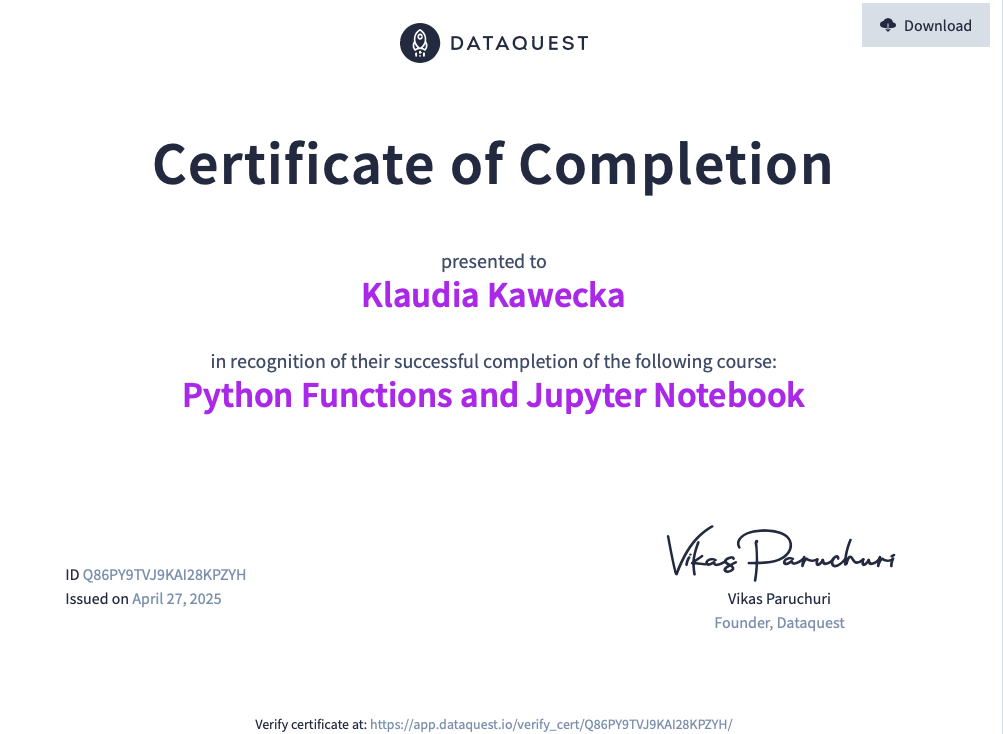

##Kurs dość trudny i wymaga zaawansowanych umiejętności analizy danych. W trakcie kursu trzeba pracować z dużymi zbiorami danych i wyciągać wnioski, które mogą pomóc w tworzeniu opłacalnych aplikacji. Choć kurs jest wymagający, daje dużo przydatnej wiedzy na temat tego, jakie aplikacje mogą odnieść sukces na rynku. Pomaga zrozumieć, jak analizować dane i podejmować decyzje biznesowe, które mogą poprawić rentowność aplikacji.